<div>    
<img src="https://cdn.bleacherreport.net/images_root/slides/photos/000/587/176/Premier_League_original.jpg?1293083692" width="500"/>
</div>

[Image Source](https://cdn.bleacherreport.net/images_root/slides/photos/000/587/176/Premier_League_original.jpg?1293083692)

# EDA on English Premier League Players Game Statistics
---

## Objectives:

- Exploratory data anlysis on English Premier League players dataset.
- Learn and apply data visualizatiosn techniques using plotly's data visualization library.

---
<a id="top"></a>

## Table of Contents
* [1. Introduction](#1)
    * [1.1 The Premier League](#1.1)
    * [1.2 The Dataset](#1.2)
    * [1.3 Data Pre-Processing](#1.3)
* [2. General Statistics](#2)
    * [2.1 Countries most represented in the EP](#2.1)
    * [2.2 Players Appearances (nr. games](#2.2)
    * [2.3 Players' Age](#2.3)
* [3. Players Stats By Playing Position](#3)
    * [3.1 Goalkeepers](#3.1)
    * [3.2 Defenders](#3.2)
    * [3.3 Midfielders](#3.3)
    * [3.4 Forwards](#3.4)
* [4. Other Statistics](#4)
    * [4.1 Goal Distribution](#4.1)
    * [4.2 Unwanted records](#4.2)
* [5. Closing Remarks](#5)   
* [6. References](#5)  
---


## 1. Introduction <a class="anchor" id="1"></a>
### 1.1 The Premier League <a class="anchor" id="1.1"></a>
The Premier League, often referred outside England as the `English Premier League or the EPL for short`, is the top level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons run from August to May with each team playing 38 matches (playing all 19 other teams both home and away). [[source](https://en.wikipedia.org/wiki/Premier_League)]

### 1.2 The Dataset <a class="anchor" id="1.2"></a>

The [dataset](https://www.kaggle.com/rishikeshkanabar/premier-league-player-statistics-updated-daily) is correct upto and including 2020-09-24 (a lot has has happen since then, notebook will be updated when the dataset gets an update). Each row in the data represents a football player currently playing in the EPL and the columns are featured used to discribe players' data and game statistics. There are 571 rows and 59 columns in the data. Few of the columns are:

* Name: Name of the player
* Jersey Number: Number at the back of his shirt
* Club: Club the player plays for at present
* Position: Playing position(Goalkeeper, Defender, Mid-fider, Forward)
* Nationality: Country the player is from
* Age: Players age
* Appearances: Number of games played (a substitute appearance aslo counts)
* Wins: Number of games the palyer has won
* Losses: Number of games the palyer has lost
* Goals: Number of goals the player has scored in the EPL
* Goals per match: Goals scored per game, etcetra.


**Notes** :

1. A player's attributes from previous premier league clubs are carried to his current club.
2. When all-time stats are considered, obviously longevity in the game plays a big role. The longer the player has played in the EPL, the higher the stats (counts of something) are going to be. Hence the *per-game* stat will be a better indicator of performance. On the other hand players who played too few games might appear as top-performers. For this reason only players who played at least 38 games are considered (a full-season's worth of games) in the per-game comparison.


In [1]:
from itertools import repeat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# My .csv file is in:  My Drive/Colab Notebooks
from google.colab import drive
drive.mount("/content/drive/")

%cd '/content/drive/MyDrive/Colab Notebooks/DS340'
!pwd #Prints the present working directory

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/DS340
/content/drive/MyDrive/Colab Notebooks/DS340


In [3]:
data = pd.read_csv('./dataset2020.csv')
data = data.copy()

In [4]:
print('Shape of the dataset is {}'.format(data.shape))
data.head()

Shape of the dataset is (571, 59)


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

### 1.3 Data pre-processing <a class="anchor" id="1.3"></a>

In [6]:
# Remove entries which do not have age, jersey number and nationality
data = data[data['Nationality'].notna()]
data = data[data['Age'].notna()]
data = data[data['Jersey Number'].notna()]

# cleaning the percentage sign
data['Cross accuracy %'] = data['Cross accuracy %'].str.replace(r'%', '').astype(float)
data['Shooting accuracy %'] = data['Shooting accuracy %'].str.replace(r'%', '').astype(float)
data['Tackle success %'] = data['Tackle success %'].str.replace(r'%', '').astype(float)

features = data.columns
data_clean = data[features]
data_clean.head()

data_clean_appNonZero = data_clean[data_clean['Appearances'] > 0] #prevents division by zero for players who are yet to make appearances

# take care off the data type for division
# separate cols with dtype objects and cols that may not be divided by appearances

cols = features.drop(['Age', 'Name', 'Appearances', 'Club', 'Nationality', 'Jersey Number', 'Cross accuracy %', 'Position', 'Goals per match',
                      'Passes per match','Tackle success %', 'Shooting accuracy %'])
data_clean_appNonZero.loc[:, cols] = data_clean_appNonZero.loc[:, cols].div(data_clean_appNonZero['Appearances'], axis=0)

# positional classifications on the data as is
goalies = data[data['Position'] == 'Goalkeeper']
defenders = data[data['Position'] == 'Defender']
midfielders = data[data['Position'] == 'Midfielder']
forwards = data[data['Position'] == 'Forward']

# palyers who have made atleast 38 games (a seasons worth games)
# data as is
data_38app = data[data['Appearances'] >=38]
goalies_38app = goalies[goalies['Appearances'] >= 38]
defenders_38app = defenders[defenders['Appearances'] >= 38]
midfilders_38app = midfielders[midfielders['Appearances'] >= 38]
forwards_38app = forwards[forwards['Appearances'] >= 38]

# palyers who have made atleast 38 games (a seasons worth games)
# data normalized
all_players = data_clean_appNonZero[data_clean_appNonZero['Appearances'] >= 38]
goalies_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Goalkeeper') & (data_clean_appNonZero['Appearances'] >= 38)]
defenders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Defender') & (data_clean_appNonZero['Appearances'] >= 38)]
midfielders_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Midfielder') & (data_clean_appNonZero['Appearances'] >= 38)]
forwards_ = data_clean_appNonZero[(data_clean_appNonZero['Position'] == 'Forward') & (data_clean_appNonZero['Appearances'] >= 38)]

<a href="#top">Back to top</a>  

## 2. General Statistics <a class="anchor" id="2"></a>
### 2.1 Countries most represented in the EPL <a class="anchor" id="2.1"></a>

In any league it is normal to have more home-grown players than foreign palyers and the EPL is no different. The majority of the players are English. Other UK member countries will also likely have more representations. The question is which country comes next? The first thing that can be a factor is geographyical proximity. What comes after that would be likely to be determined by talent baring workpermit issue and visa-related challenges that could prevent some players from playing/working in the EPL. But that is a rarity. Below are the top three nations after home country (England) ranked by overall apprearances and further breakdown by players playing positions.

#### Summary most represented nations:

* Overall: 1st **France**, 2nd **Spain**, 3rd *Brazil*
* Goalkeepers: 1st **Spain**, 2nd Denmark, 3rd **France**
* Defenders: 1st **Spain**, 2nd Nederland, 3rd *Ireland*
* Midfielders: 1st *Scotland*, 2nd **France**, 3rd **Spain**
* Forwards: 1st *Brazil*, 2nd **France**, 3rd *Ireland*

**French** and **Spanish** players found their second home in England. Honorable mention to **Brazil**

In [7]:
import plotly.offline as pyo
import plotly.express as px
import pandas as pd

# Assuming 'data' is already defined and loaded into DataFrame 'df'
# If 'data' is not defined, replace 'data' with your DataFrame variable
df = data  # Ensure 'data' is your DataFrame containing the necessary columns

fig = px.sunburst(df,
                  path=['Position', 'Nationality'],  # Adjust columns as needed
                  values='Appearances',  # Ensure this column exists in your DataFrame
                 )
fig.update_layout(title_text='<b>Players position by country <b>',
                  title_x=0.5,
                  titlefont=dict(color='black', size=28, family="Courier New, monospace"),
                  width=600,
                  height=600,
                  showlegend=False)

file_path = '/content/drive/My Drive/Colab Notebooks/DS340/Visuals/apps_country.html'
pyo.plot(fig, filename=file_path, auto_open=False)  # Added 'auto_open=False' to prevent automatic opening of the file


'/content/drive/My Drive/Colab Notebooks/DS340/Visuals/apps_country.html'

In [8]:
import plotly.offline as pyo

# Your existing Plotly figure code
df = data
fig = px.sunburst(df,
                  path=['Position', 'Nationality'],
                  values='Appearances',
                 )
fig.update_layout(title_text='<b>Players position by country <b>',
                  title_x=0.5,
                  titlefont=dict(color='black',
                                 size=28,
                                 family="Courier New, monospace",),
                  width=600,
                  height=600,
                  showlegend=False,
                 )

file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/position_country.html'
pyo.plot(fig, filename=file_path)


'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/position_country.html'

### 2.2 Players Appearances (nr. games) <a class="anchor" id="2.2"></a>

Longevity, versatility, quality of the player & the squad and  playing position are major factors for number of appearances.  

Most of the appearances come from defence and midfield position. No surprise here. If the most common line-ups/systems (4-4-2, 4-5-1, 3-5-2, 4-3-3) are averaged they would look like in the graph below. Usually midfielders are versatile and can play in defence or in attack if needed. So they constitute the majority of a given squad.

#### Summary most appearances

- Goalkeeper: Joe Hart, 340
- Defender: Phil Jagielka, 366
- Midfielder: James Milner, 539
- Forward: Theo Walcott, 346

In [9]:
df = data
fig = px.bar(df, x="Position", y="Appearances",color='Club',
             hover_data=["Name"],
             width=750, height=600,)
fig.update_layout(
             template='ggplot2',
             title='<b>Players appearance by position<b>',
             titlefont={'size':24})

file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/apps_position.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/apps_position.html'

In [10]:
fig = px.bar(df, y="Club", x="Appearances",color='Position',
             hover_data=["Name"],
             width=750,
             height=600,
             )
fig.update_layout(
             template='ggplot2',
             title='<b>Appearance by club<b>',
             titlefont={'size':24},
)
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/apps_club.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/apps_club.html'

### 2.3 Players' Age <a class="anchor" id="2.3"></a>
Goalkeepers and defender are relatively older than thier mid-field and attacking colleagues. The defence line (including goalkeepers) is widely regarded as the area where more of a wise-head/cool-headed than a lightning fast leg is need. No harm if a defender is fast, there are many of them. But most defenders mature with age. Being an older defender is not a bad thing.

**Summary:**
* The yougest squad is Leeds-United
* Liverpool are the oldest group of players
* The min, median and max ages are 17, 25.8 and 38 years

**Extra info:**

The youngest ever EPL player: Harvey Elliott – 16 years and 30 days (Liverpool, made debut on May 2019)

The olderst ever EPL player: John Burridge – 43 years and 163 days (Aston Villa, played last 1995)

<a href="#top">Back to top</a>  

In [11]:
df = data
age_avg=df['Age'].mean()
fig = px.violin(df, y="Age", x="Position", box=True,
                title='<b> Players Age distribution by position (avg. age dotted line)<b>',
                width=600,height=400,template='simple_white')
fig.add_shape(
    type="line", line_color="blue", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=age_avg, y1=age_avg, yref="y"
)
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/age_position.html'
pyo.plot(fig, filename=file_path)

fig = px.box(df, y="Club", x="Age",
            title='<b>Players Age distribution by club (avg. age dotted line)<b>',
            width=750,height=750,template='ggplot2')
fig.add_shape(
    type="line", line_color="black", line_width=3, opacity=1, line_dash="dot",
    y0=0, y1=1, yref="paper", x0=age_avg, x1=age_avg, xref="x"
)
# fig.update_layout( yaxis={'categoryorder':'total descending'})
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/age_club.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/age_club.html'

<div>    
<img src="https://cdn.standardmedia.co.ke/images/thursday/spwhmm6qtavglc4atib5ed0054dcc631.jpg" width="500"/>    
</div>

## 3. Players Stats By Playing Position <a class="anchor" id="3"></a>
### 3.1 Goalkeepers  <a class="anchor" id="3.1"></a>

One of the key stats for goalkeepers is the much coveted `clean sheet` (conceeding zero goals in a game). Although this stat is not entierly dependent on the performance/ability of the goalkeeper only (a solid defence-line infront of a goalkeeper always helps), this metric shows how good a goal keeper is. The goalkeeper who kept the most clean sheets is awarded a golden-glove for thier effort at the end of a season. Other important qualities of a goalkeeper are:

*  Clean sheets
*  Saves
*  Penalties saved
*  Punches
*  High Claims
*  Catches

**Extra info**:
Most Expensive goal keepers in the EPL are:
1. Kepa Arrizabalaga (SPN), Athletic Bilbao to Chelsea in 2018, £71m
2. Alisson Becker (BRA), AS Roma to Liverpool in 2018, £65m
3. Ederson Moraes (BRA), Benfica to Manchester City in 2017, £34.7m

[Here is the reference. ](https://www.espn.com/soccer/soccer-transfers/story/3135816/the-10-most-expensive-goalkeepers-kepa-alisson-becker-courtois-ederson)


In [12]:
from plotly.subplots import make_subplots

head = 5
df1=goalies_38app.sort_values(by='Clean sheets', ascending=False).head(head)
df2=goalies_38app.sort_values(by='Saves', ascending=False).head(head)
df3=goalies_38app.sort_values(by='High Claims', ascending=False).head(head)
df4=goalies_38app.sort_values(by='Catches', ascending=False).head(head)

df11=goalies_.sort_values(by='Clean sheets', ascending=False).head(head)
df12=goalies_.sort_values(by='Saves', ascending=False).head(head)
df13=goalies_.sort_values(by='High Claims', ascending=False).head(head)
df14=goalies_.sort_values(by='Catches', ascending=False).head(head)

fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=('Clean sheets (overall)', 'Clean sheets (per-game)','Saves (overall)','Saves (per-game)',
                    'High Claims (overall)', 'High Claims (per-game)','Catches (overall)', 'Catches (per-game)'),
    horizontal_spacing = 0.12,
    vertical_spacing = 0.075)

fig.add_trace(go.Bar(
                y=df1["Name"],
                x=df1['Clean sheets'],
                hovertext=df1['Club'],
                orientation='h'),
                row=1, col=1)

fig.add_trace(go.Bar(
                y=df2["Name"],
                x=df2['Saves'],
                hovertext=df2['Club'],
                orientation='h'),
                row=2, col=1)

fig.add_trace(go.Bar(
                y=df3["Name"],
                x=df3['High Claims'],
                hovertext=df3['Club'],
                orientation='h'),
                row=3, col=1)

fig.add_trace(go.Bar(
                y=df4["Name"],
                x=df4['Catches'],
                hovertext=df4['Club'],
                orientation='h'),
                row=4, col=1)


fig.add_trace(go.Bar(
                y=df11["Name"],
                x=df11['Clean sheets'],
                hovertext=df11['Club'],
                orientation='h'),
                row=1, col=2)

fig.add_trace(go.Bar(
                y=df12["Name"],
                x=df12['Saves'],
                hovertext=df12['Club'],
                orientation='h'),
                row=2, col=2)

fig.add_trace(go.Bar(
                y=df13["Name"],
                x=df13['High Claims'],
                hovertext=df13['Club'],
                orientation='h'),
                row=3, col=2)

fig.add_trace(go.Bar(
                y=df14["Name"],
                x=df14['Catches'],
                hovertext=df14['Club'],
                orientation='h'),
                row=4, col=2)

fig.update_traces(marker_color= ['rgb(110,102,250)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)',], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)
fig.update_layout(title_text='<b> Top goalkeepers stat<b>',
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=1300,
                  height=1200,
                  template='ggplot2',
                  paper_bgcolor='lightgray',
                  #plot_bgcolor='lightgray',
                 )
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_gk.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_gk.html'

<a href="#top">Back to top</a>  
<div>    
<img src="https://staticg.sportskeeda.com/editor/2020/01/ed476-15783945689891-800.jpg" width="500"/>    
</div>

### 3.2 Defenders <a class="anchor" id="3.2"></a>

In a game of footall (in fact in any game where a draw is possible) if you can not win the game then do not lose it. That means defend well and do not concede a goal. For that to happen derenders play a huge part. Good defenders are able to read the game very well and sense where the danger is in time. They know when to join the party (attacking) or sit back and defend. Although they are rare to find, there are defenders who can do more than their own job by assisting goals and scoring themselves as well. Let's see who are the best defenders at doing their job and who are contributing more than they are needed to.

**Extra info**:
Most expensive defender in the EPL:
1. Harry Maguire (Leicester City to Manchester United) - €87million
2. Virgil van Dijk (Southampton to Liverpool) - €84.65 million
3. Joao Cancelo (Juventus to Manchester City) - €65 million

Contrary to the transfer fees, big Virgil is the best defender in the list, if not in the world (of course my opinion)

[Here is the reference.](https://www.kickoff.com/news/articles/world-news/categories/news/english-premier-league/the-10-most-expensive-defenders-of-all-time/681803?gallery=681803&gallery-page=11#ig)

In [13]:
defenders_attr =['Blocked shots', 'Interceptions', 'Clearances','Headed Clearance', 'Clearances off line',
                 'Duels won','Successful 50/50s', 'Aerial battles won']
# top=5
# defenders_attr =['Tackles', 'Tackle success'Interceptions' %', 'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
#                  'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won','Successful 50/50s', 'Aerial battles won']
# for atr in defenders_attr:
#     text = 5
#     df = data_38app[data_38app["Position"] == 'Defender'].sort_values(by=atr, ascending=False).head(top)
#     fig = px.bar(df, x="Name",
#                  y=atr,
#                  color='Club',
#                  hover_name=None,
#                  title="Defender defensive ability: Top {} {} ".format(text, atr.lower()))
#     fig.update_layout(autosize=False, width=1000, height=500)
#     iplot(fig)


top = 5
fig = make_subplots(
    rows=5, cols=2,
    horizontal_spacing = 0.05,
    vertical_spacing = 0.075,
    subplot_titles=('Blocked shots (overall)', 'Blocked shots (per-game)','Interceptions (overall)', 'Interceptions (per-game)','Clearances (overall)',
                    'Clearances (per-game)','Headed Clearance (overall)', 'Headed Clearance (per-game)','Clearances off line (overall)', 'Clearances off line (per-game)'),
    )


df = defenders_38app.sort_values(by='Blocked shots', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"],
             y=df['Blocked shots'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=1)

df = defenders_38app.sort_values(by='Interceptions', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"],
             y=df['Interceptions'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=1)

df = defenders_38app.sort_values(by='Clearances', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"],
             y=df['Clearances'],
             #color='Club',
            #hover_name=None,
             orientation='v'),
             row=3, col=1)


df = defenders_38app.sort_values(by='Headed Clearance', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"],
             y=df['Headed Clearance'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=1)

df = defenders_38app.sort_values(by='Clearances off line', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"],
             y=df['Clearances off line'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=1)


df = defenders_.sort_values(by='Blocked shots', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"],
             y=df['Blocked shots'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=1, col=2)

df = defenders_.sort_values(by='Interceptions', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"],
             y=df['Interceptions'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=2, col=2)


df = defenders_.sort_values(by='Clearances', ascending=False).head(top)
fig.add_trace(go.Bar(x=df["Name"],
             y=df['Clearances'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=3, col=2)


df = defenders_.sort_values(by='Headed Clearance', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"],
             y=df['Headed Clearance'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=4,col=2)

df = defenders_.sort_values(by='Clearances off line', ascending=False).head(top)
fig.add_trace(go.Bar( x=df["Name"],
             y=df['Clearances off line'],
             #color='Club',
             #hover_name=None,
             orientation='v'),
             row=5, col=2)

#fig.update_layout(title_text='Top Defender Qualities', title_x=0.5)
fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(210,202,82)','rgb(210,202,82)','rgb(210,202,82)',
                                 'rgb(210,202,82)', 'rgb(210,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Defender Qualities<b>',
                  titlefont={'size':28},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=1300,
                  height=1300,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_df.html'
pyo.plot(fig, filename=file_path)


'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_df.html'

<div>    
<img src="https://assets-cms.thescore.com/uploads/image/file/215195/w1280xh966_EPL.jpg?ts=1479567580" width="500"/>    
</div>

### 3.3 Midfielders <a class="anchor" id="3.3"></a>

As it's often called mid-field is the engine-room of a football team. Mid-fielders dictate the tempo of the game, they help their attacking or defending team mates depending on the situation of their team is in. Their ability to thread in an incisive pass or their awarness to sense danger before their defending colleagues are in trouble are crucial qualities of a good mid-fielder. All great teams past and present had/have a couple world-class mid-fielders in them. Below some of these attributes are summerized.



In [14]:
mid_field_attr_D =['Recoveries','Duels won','Successful 50/50s','Aerial battles won']

col=2
row=4

top = 5
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=('Recoveries (overall)','Recoveries (per-game)','Duels won (overall)','Duels won (per-game)','Successful 50/50s (overall)',
                    'Successful 50/50s (per-game)','Aerial battles won (overall)', 'Aerial battles won (per-game)'))

for i, atr in enumerate(mid_field_attr_D):
    df = data_38app[data_38app["Position"] == 'Midfielder'].sort_values(by=atr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'],
         y=df[atr],
         orientation='v'),
         row=i+1, col=1)

for j, atr in enumerate(mid_field_attr_D):
    df = midfielders_.sort_values(by=atr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'],
         y=df[atr],
         orientation='v'),
         row=j+1, col=2)

    fig.update_traces(marker_color= ['rgb(96, 96, 96)','rgb(110,202,82)','rgb(110,202,82)','rgb(110,202,82)',
                                    'rgb(110,202,82)', 'rgb(110,202,82)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Midfield Qualities: Defense Ability<b>',
                  titlefont={'size': 28, 'family':'Courier'},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=1200,
                  height=1200,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_mid_df.html'
pyo.plot(fig, filename=file_path)


'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_mid_df.html'

In [15]:
mid_field_attr_A =['Assists','Big chances created','Cross accuracy %','Through balls']
col=2
row=4

top = 5
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=('Assists (overall)','Assists (per-game)','Big chances created (overall)','Big chances created (per-game)','Cross accuracy % (overall)',
                    'Cross accuracy % (per-game)','Through balls (overall)', 'Through balls (per-game)'))

for i, atr in enumerate(mid_field_attr_A):
    df = data_38app[data_38app["Position"] == 'Midfielder'].sort_values(by=atr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'],
         y=df[atr],
         orientation='v'),
         row=i+1, col=1)

for j, atr in enumerate(mid_field_attr_A):
    df = midfielders_.sort_values(by=atr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'],
         y=df[atr],
         orientation='v'),
         row=j+1, col=2)

    fig.update_traces(marker_color= ['rgb(255, 208, 288)','rgb(100,100,100)','rgb(100,100,100)','rgb(100,100,100)',
                                    'rgb(100,100,100)', 'rgb(100,100,100)'], marker_line_color='rgb(8,48,107)',
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b>Top Midfield Qualities: Creative Ability<b>',
                  titlefont={'size': 28, 'family':'Courier'},
                  title_x=0.5,
                  showlegend=False,
                  autosize=False,
                  width=1200,
                  height=1200,
                  template='ggplot2',
                  paper_bgcolor='lightgray')
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_mid_attack.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_mid_attack.html'

<a href="#top">Back to top</a>  
<div>    
<img src="https://dailypost.ng/wp-content/uploads/2019/04/epl-top-scorers-1.jpg" width="500"/>    
</div>

### 3.4 Forwards <a class="anchor" id="3.4"></a>

#### Goals, goals and goals:

Winning a game is the ultimate goal of the beautiful game. Scoring more goals that your opponent will do just that. We all watch football and enjoy when the team we support or our favorite team scores gaol/s. And enjoy the moment. Some would argue that goals just for the sake of goals are meaningless without attractive, entertaining attacking football. But goals goals are that wins you games. Below are the goals machines in the EPL.

1. Most goals: Sergio Aguero, Harry Kane, Jamie Vardy
2. Most right foot goals: Sergio Aguero, Harry Kane, Jamie Vardy
3. Most left foot goals: Mohammed Salah, Oliver Giroud, Ryhad Mahrez
4. Most headed goals: Oliver Giroud, Christian Benket, Andy Carrol
5. Most goal scoring nations: England, France, Brazil Argentina

In [16]:
headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'


head = 10
table_header = ['Rank', 'Total goals','Goals with right foot','Goals with left foot','Headed goals']
df = data_38app

fig = go.Figure(data=[go.Table(

    header=dict(values=list(table_header),
                    line_color='darkslategray',
                    fill_color=headerColor,
                    align=['left'],
                    font=dict(color='white', size=20),
                    height=30
                               ),

    cells=dict(values=[list(np.arange(1, head+1)),
        data_38app.sort_values(by='Goals', ascending=False)['Name'].head(head),

        data_38app.sort_values(by='Goals with right foot', ascending=False)['Name'].head(head),
        data_38app.sort_values(by='Goals with left foot', ascending=False)['Name'].head(head),
        data_38app.sort_values(by='Headed goals', ascending=False)['Name'].head(head)],

       fill_color=[[rowOddColor,rowEvenColor]*5],
       font=dict(color='black', size=16, family="Courier New, monospace",),
       align='left', height=25,)
        )
])
fig.update_layout(title_text='TOP {} GOAL SCORERS'.format(head), title_x=0.5, font=dict(color='white', size=20, family="Courier New, monospace",))
fig.update_layout(width=1200, height=550, template='plotly_dark')
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_goal.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_goal.html'

In [17]:
#data = data_38app.head(10)
fig = px.pie(data,
             values='Goals',
             names='Nationality',
             title='<b>Player of which country score the most goals? <b>',
             width=550, height=550,
             )
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  showlegend= False,
                 )
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_goal_country.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/top_goal_country.html'

In [18]:
#Headed goals
hg_f =data[data['Position'] == 'Forward']['Headed goals'].sum()
hg_m =data[data['Position'] == 'Midfielder']['Headed goals'].sum()
hg_d =data[data['Position'] == 'Defender']['Headed goals'].sum()
hg_kg =data[data['Position'] == 'Goalkeeper']['Headed goals'].sum()
#Goals with right foot
rfg_f =data[data['Position'] == 'Forward']['Goals with right foot'].sum()
rfg_m =data[data['Position'] == 'Midfielder']['Goals with right foot'].sum()
rfg_d =data[data['Position'] == 'Defender']['Goals with right foot'].sum()
rfg_kg =data[data['Position'] == 'Goalkeeper']['Goals with right foot'].sum()
#Goals with left foot
lfg_f =data[data['Position'] == 'Forward']['Goals with left foot'].sum()
lfg_m =data[data['Position'] == 'Midfielder']['Goals with left foot'].sum()
lfg_d =data[data['Position'] == 'Defender']['Goals with left foot'].sum()
lfg_kg =data[data['Position'] == 'Goalkeeper']['Goals with left foot'].sum()


## 4. Other Statistics <a class="anchor" id="4"></a>
### 4.1 Goal distribution <a class="anchor" id="4.1"></a>
Summary:

* Forwards score more goals (obvious)
* Right-footed goals are dominant
* Defenders love to head
* The big hitters are Machester City, Liverpool and Tottenham
* The new boys (Leeds United have the fewest goals scored)
* **Crystal Palace defenders** have the best goal-scoring defenders


In [19]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=data['Club'],
    y=data['Goals with right foot'],
    name='Right foot goals',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data['Club'],
    y=data['Goals with left foot'],
    name='Left foot goals',
   marker_color='lightsalmon'
))

fig.add_trace(go.Bar(
    x=data['Club'],
    y=data['Headed goals'],
    name='Headers',
   marker_color='lightseagreen'
))

fig.update_layout(barmode='group',)# xaxis_tickangle=-45)
fig.update_layout(title_text="<b>Goal distribution by club<b>",
                  titlefont={'size': 24, 'family': 'Courier'},
                  width=750,
                  height =500,
                  template='simple_white'
                 )

file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/goal_club.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/goal_club.html'

In [20]:
df = data

fig = px.sunburst(df, path=['Position', 'Club'], values='Headed goals')
fig.update_layout(title_text="<b>Headed goals (Club, position)<b>",
                  titlefont= {'size': 24},
                  width=500,
                  height=500)
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/head.html'
pyo.plot(fig, filename=file_path)

fig1 = px.sunburst(df, path=['Position', 'Club'], values='Goals with left foot')
fig1.update_layout(title_text="<b>Left footed goals (Club, position<b>",
                   titlefont= {'size': 24,},
                   width=500,
                   height=500)
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/left.html'
pyo.plot(fig, filename=file_path)

fig2 = px.sunburst(df, path=['Position', 'Club'], values='Goals with right foot')
fig2.update_layout(title_text="<b>Right footed goals (Club, position)<b>",
                   titlefont= {'size': 24,},
                   width=500,
                   height=500)
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/right.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/right.html'

In [21]:
goals_groupedby_clubs=data.groupby(['Club']).agg({'Goals with left foot':sum,
                                                  'Goals with right foot':sum, 'Headed goals': sum })


all_nodes = ['Forwards', 'Midfielders', 'Defenders', 'Right foot goals', 'Left foot goals', 'Headed goals',
           'Arsenal', 'Aston-Villa', 'Brighton-and-Hove-Albion', 'Burnley',
           'Chelsea', 'Crystal-Palace', 'Everton', 'Fulham', 'Leeds-United',
           'Leicester-City', 'Liverpool', 'Manchester-City', 'Manchester-United',
           'Newcastle-United', 'Sheffield-United', 'Southampton',
           'Tottenham-Hotspur', 'West-Bromwich-Albion', 'West-Ham-United',
           'Wolverhampton-Wanderers']


# source nodes
list_1 = [0,1,2]
list_2 = [3,4,5]
source = 3*list_1 + 20*list_2


# target nodes
target = []
for tar in range(3, 26):
    target.extend(repeat(tar, 3))

#
R = goals_groupedby_clubs['Goals with right foot'].values
L = goals_groupedby_clubs['Goals with left foot'].values
H = goals_groupedby_clubs['Headed goals'].values

#
goals_scored = []
for i in range(len(R)):
    goals_scored.append(R[i])
    goals_scored.append(L[i])
    goals_scored.append(H[i])

value = [rfg_f, rfg_m, rfg_d, lfg_f, lfg_m, lfg_d, hg_f, hg_m, hg_d] + goals_scored


fig = go.Figure(
      data=[go.Sankey(
      node = dict(
      pad = 2,
      thickness = 75,
      line = dict(color = "gray", width = 0.75),
      label = all_nodes,
      color = ['#67AEE1', '#ff6e4a', '#48bf91'] +
          3*['gold'] + 20*['#babad4']#node_colors

    ),

    link = dict(
       source = source,

       target = target,

       value =  value,

       color = 26*['#94C6EA', '#ffb6a4', '#a3dfc8'],
       #color = 26*['#d8d8d8', '#a7a7a7', '#4f4f4f']
))])

fig.update_layout(title_text="<b> Distribution of goals: <b> "\
                  '<br><span style="font-size:16px; color: darkgray"> By player position, club and part-of-body scored by',
                  titlefont={'size': 28, 'family': 'Courier'})
fig.update_traces(textfont_family='Courier', selector=dict(type='sankey'))
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/goals.html'
pyo.plot(fig, filename=file_path)

'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/goals.html'

<a href="#top">Back to top</a>  
### 4.2 Unwanted records <a class="anchor" id="4.2"></a>

Of course like in everyday-life, sometimes things happen in football wheather players like it or not. In football terms own goals, assisting the wrong player (aka error leading to a goal), being sent-off are some of the major ones. Let's see who are the unfortunate ones.

**Summary**

- Surprisingly Sergio Aguero (who's the top scorer) is also a big chance squanderer.
- Joe Hart is error prone. No wonder Pep Guardiola has shown him the doors when he took-over at Manchester City.
- Phil Jagielka love his own net, i.e has more own goals.
- No wonder Mark Nobel is the biggest losser with so many recards to his name.
- Wondered how many times Gabriel Jesus calls his own name (swears)? 0.56 time per game (that is his big chances missed per game)


In [22]:
unwanted_records = ['Losses', 'Big chances missed','Own goals','Errors leading to goal', 'Red cards']
col=2
row=5

top = 5
fig = make_subplots(
    rows=5, cols=2,
    subplot_titles=('Losses (overall)', 'Losses (per-game)','Big chances missed (overall)','Big chances missed (per-game)',
                    'Own goals (overall)','Own goals (per-game)', 'Errors leading to goal (overall)',
                    'Errors leading to goal (per-game)','Red cards (overall)', 'Red cards (per-game)'))

for i, atr in enumerate(unwanted_records):
    df = data_38app.sort_values(atr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'],
         y=-df[atr],
         orientation='v'),
         row=i+1, col=1)

for j, atr in enumerate(unwanted_records):
    df = all_players.sort_values(atr, ascending=False).head(top)
    fig.add_trace(go.Bar(x=df['Name'],
         y=-df[atr],
         orientation='v'),
         row=j+1, col=2)

    fig.update_traces(marker_color= ['rgb(255, 0, 0)'],
                  marker_line_width=2.5, opacity=0.6)

fig.update_layout(title_text='<b> List of the unfortunates <b>',
                  titlefont={'size': 28, 'family':'Courier'},
                  showlegend=False,
                  autosize=False,
                  width=1200, height=1100,
                  paper_bgcolor='lightgray',
                  plot_bgcolor='lightgray',
                 )
file_path = '/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/bad.html'
pyo.plot(fig, filename=file_path)


'/content/drive/MyDrive/Colab Notebooks/DS340/Visuals/bad.html'

## 5. Our Novalties  <a class="anchor" id="5"></a>





In [23]:
# Creating a new column for Headed goals per shot on target
# Check for rows where shots on target is zero to avoid division by zero
data.loc[data['Shots on target'] == 0, 'Shots on target'] = 1  # This line avoids division by zero by setting 0 to 1. Consider how you want to handle this case.

# Create a new column for headed goals per shots on target
data['Headed Goals per Shots on Target'] = data['Headed goals'] / data['Shots on target']

# Display the first few rows to verify the new column
data


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Headed Goals per Shots on Target
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0,NaN
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0,0.000000
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0,0.109756
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0,0.000000
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,0.000000


In [24]:

# Calculating Header Effectiveness Score
# Note: You might need to calculate 'Headed Shots on Target' from existing data if not directly available.

# Example placeholder for 'Headed Shots on Target' if direct data is unavailable
# For illustration, let's assume it's 70% of 'Shots on target' for simplicity. Adjust according to your data structure or calculation.
data['Headed Shots on Target'] = data['Shots on target'] * 0.7

# Calculate the Header Effectiveness Score
data['Header Effectiveness Score'] = (2 * data['Headed goals']) + (0.5 * data['Aerial battles won']) + (1 * data['Headed Shots on Target'])

data


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Headed Goals per Shots on Target,Headed Shots on Target,Header Effectiveness Score
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,28.0,375.0,489.0,2,0,0,NaN,NaN,NaN,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,23,0,125,8.0,NaN,NaN,NaN
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,2,0,9,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,3,0,16,5.0,0.000000,4.2,NaN
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,7,0,81,52.0,0.109756,57.4,NaN
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,4,0,80,13.0,0.000000,14.7,NaN
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,0,0,0,0.0,0.000000,0.7,NaN


In [25]:
# Assuming 'data' is your DataFrame

# Drop rows where the target 'Header Effectiveness Score' is NaN
data_clean = data.dropna(subset=['Header Effectiveness Score'])

# Prepare the features (X) and target (y) after cleaning
X = data_clean[['Position', 'Aerial battles won', 'Age']]
y = data_clean['Header Effectiveness Score']

# The rest of the preprocessing and model fitting code remains the same

# Define the preprocessing for numerical features: impute missing values with median
numerical_features = ['Aerial battles won', 'Age']
numerical_transformer = SimpleImputer(strategy='median')

# Define preprocessing for categorical features: impute missing values with a placeholder and apply one-hot encoding
categorical_features = ['Position']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing and modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('linear_regression', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of the predictions: {:.2f}".format(rmse))

# Assuming 'data' is your DataFrame and it includes the 'Game Impact Score' column
sorted_data = data.sort_values(by='Header Effectiveness Score', ascending=False)

# Now 'sorted_data' will have the rows ordered by 'Game Impact Score' in descending order
print(sorted_data[['Name', 'Header Effectiveness Score']])

RMSE of the predictions: 23.80
                 Name  Header Effectiveness Score
159  Cheikhou Kouyaté                       321.3
302      James Milner                       276.2
543   Michail Antonio                       275.9
337       Fernandinho                       261.6
477         Eric Dier                       235.9
..                ...                         ...
566        Pedro Neto                         NaN
567      Raúl Jiménez                         NaN
568      Adama Traoré                         NaN
569       Fábio Silva                         NaN
570  Leonardo Campana                         NaN

[562 rows x 2 columns]


In [26]:
# Assuming y_test and y_pred are already defined

# Convert y_pred to a DataFrame with a matching index to y_test
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=['Predicted Header Effectiveness Score'])

# Merge the predictions with the original DataFrame (or the test subset for direct comparison)
# Here, we'll demonstrate adding it back to the entire DataFrame for context
data_with_predictions = data.join(y_pred_df, how='left')

# Now 'data_with_predictions' contains the original data along with a new column for the predicted scores where available
# Note: Only rows that were in the test set will have a value in 'Predicted Header Effectiveness Score'; others will be NaN

print(data_with_predictions[['Header Effectiveness Score', 'Predicted Header Effectiveness Score']].head())


   Header Effectiveness Score  Predicted Header Effectiveness Score
0                         NaN                                   NaN
1                         NaN                                   NaN
2                         NaN                                   NaN
3                         NaN                                   NaN
4                         NaN                                   NaN


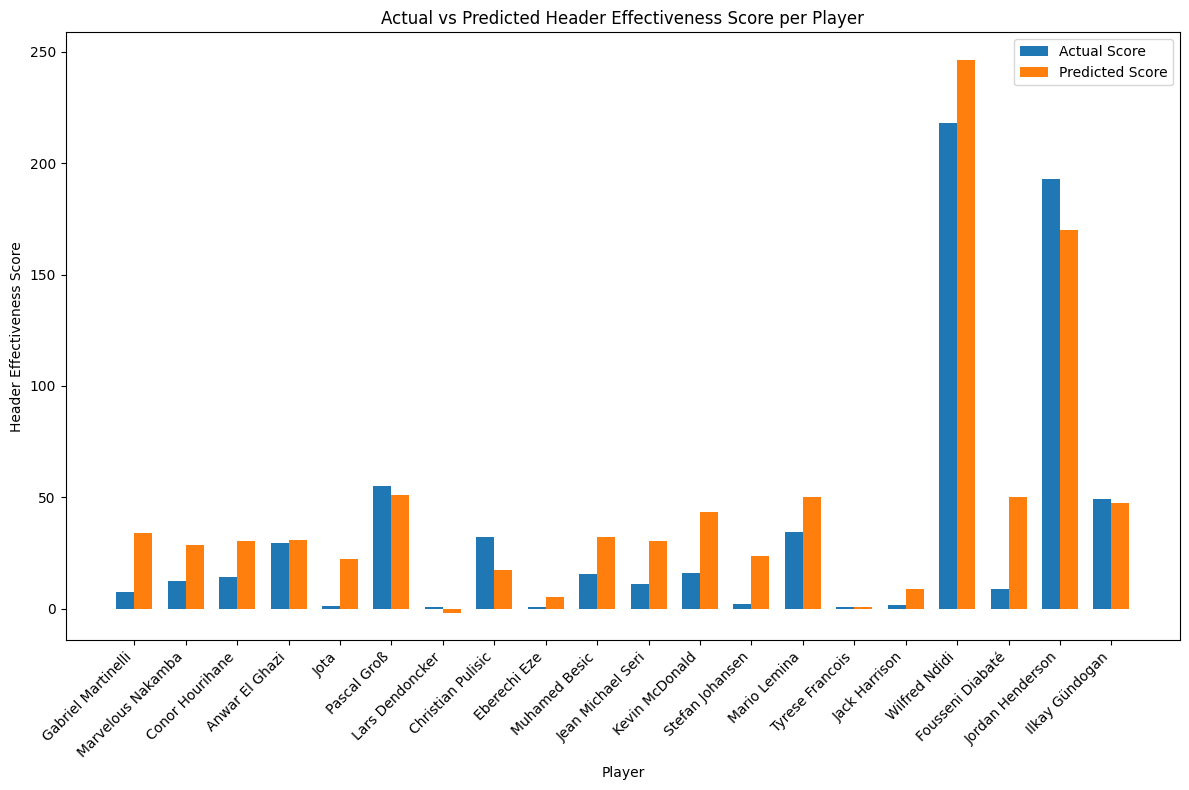

In [27]:

# Filter to only rows with predictions for clarity in visualization
test_data_with_predictions = data_with_predictions.dropna(subset=['Predicted Header Effectiveness Score'])

# Since plotting all players may be cluttered, let's take a subset, e.g., the first 20 players in the test set for clarity
subset_test_data = test_data_with_predictions.head(20)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted for better readability of names
indices = range(len(subset_test_data))
bar_width = 0.35

actual_bars = ax.bar(indices, subset_test_data['Header Effectiveness Score'], bar_width, label='Actual Score')
predicted_bars = ax.bar([p + bar_width for p in indices], subset_test_data['Predicted Header Effectiveness Score'], bar_width, label='Predicted Score')

ax.set_xlabel('Player')
ax.set_ylabel('Header Effectiveness Score')
ax.set_title('Actual vs Predicted Header Effectiveness Score per Player')
ax.set_xticks([p + bar_width / 2 for p in indices])
# Using player names for the x-axis labels
ax.set_xticklabels(subset_test_data['Name'], rotation=45, ha="right")  # 'ha' is for horizontal alignment
ax.legend()

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [28]:
data['Game Impact Score'] = data['Goals'] + data['Assists'] + data['Aerial battles won'] + data['Interceptions'] + data['Passes per match']

# First, remove rows where 'Game Impact Score' is NaN
data_clean = data.dropna(subset=['Game Impact Score'])

# Prepare the data with the cleaned dataset
X = data_clean[['Age', 'Position', 'Aerial battles won']]
y = data_clean['Game Impact Score']

# Define preprocessing for categorical and numerical features
categorical_features = ['Position']
numerical_features = ['Age', 'Aerial battles won']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = SimpleImputer(strategy='median')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for data preprocessing and model training
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))


# Assuming 'data' is your DataFrame and it includes the 'Game Impact Score' column
sorted_data = data.sort_values(by='Game Impact Score', ascending=False)

# Now 'sorted_data' will have the rows ordered by 'Game Impact Score' in descending order
print(sorted_data[['Name', 'Game Impact Score']])


RMSE: 77.86
                 Name  Game Impact Score
151       Gary Cahill            1680.01
419     Phil Jagielka            1468.37
148     James Tomkins            1316.22
261       Jonny Evans            1290.58
291   Virgil van Dijk            1137.38
..                ...                ...
566        Pedro Neto                NaN
567      Raúl Jiménez                NaN
568      Adama Traoré                NaN
569       Fábio Silva                NaN
570  Leonardo Campana                NaN

[562 rows x 2 columns]


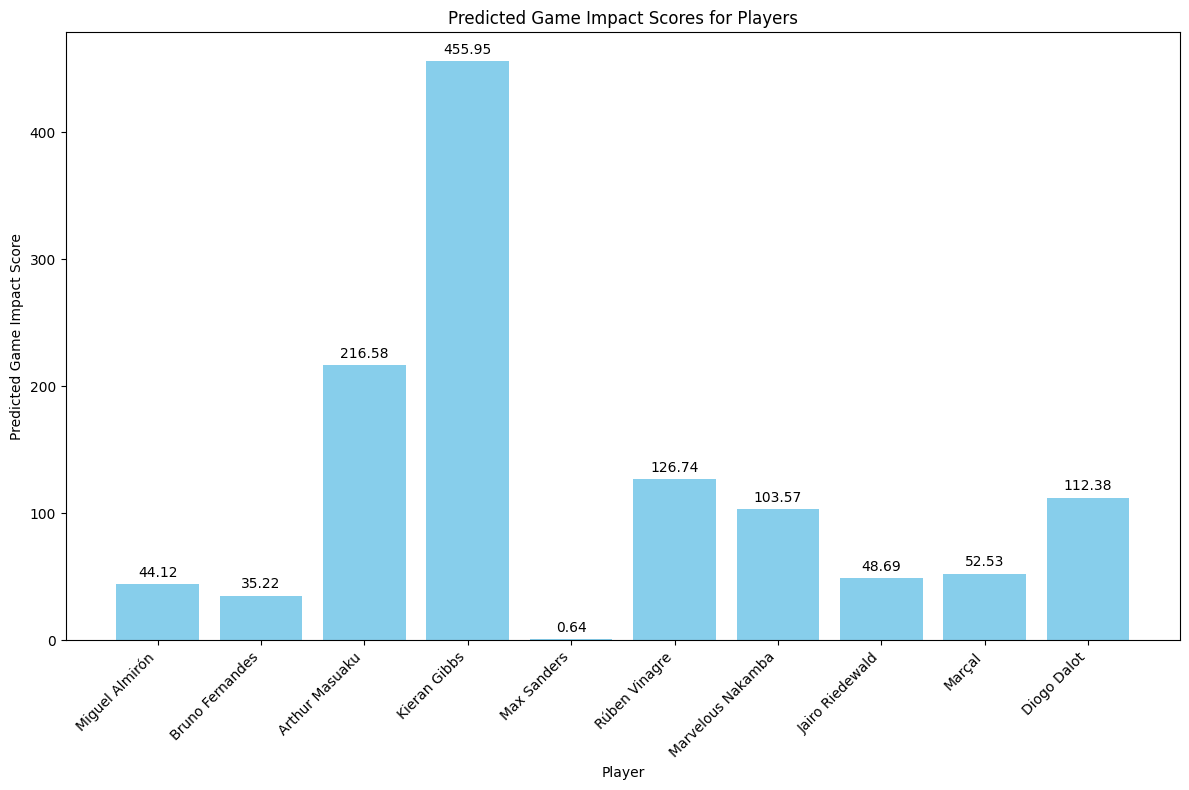

In [29]:


num_players = 10
# Getting player names for the test subset
player_names_test_set = data.loc[y_test.index, 'Name'].iloc[:num_players]

# Predicted scores for the subset of players
predicted_scores = y_pred[:num_players]

# Setting up the plot
fig, ax = plt.subplots(figsize=(12, 8))
indices = np.arange(len(predicted_scores))  # array of player indices for plotting

# Plotting predicted scores
predicted_bars = ax.bar(indices, predicted_scores, color='skyblue', label='Predicted Game Impact Score')

# Adding value labels above bars
for bar in predicted_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Setting x-axis labels to player names and making sure they're readable
ax.set_xticks(indices)
ax.set_xticklabels(player_names_test_set, rotation=45, ha='right')

# Adding labels and title
ax.set_xlabel('Player')
ax.set_ylabel('Predicted Game Impact Score')
ax.set_title('Predicted Game Impact Scores for Players')

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
data['Is_Brazilian'] = data['Nationality'].apply(lambda x: 1 if x == 'Brazil' else 0)

# Example features - replace with your actual features
features = ['Age', 'Appearances', 'Goals', 'Headed goals']
X = data[features]
y = data['Is_Brazilian']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation (replace with actual data loading)
# data = pd.read_csv('path_to_your_dataset.csv')

# Assuming the 'data' DataFrame has the features and 'Nationality' as target
X = data[['Age', 'Appearances', 'Goals', 'Headed goals']]  # Example features
y = data['Is_Brazilian']  # Assuming this column exists, indicating 1 for Brazilian and 0 for others

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline that first imputes the missing values then trains a RandomForest model
pipeline = make_pipeline(imputer, RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the pipeline to your data
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.96


<ipython-input-32-8c81ca2f6a5a>:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-32-8c81ca2f6a5a>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




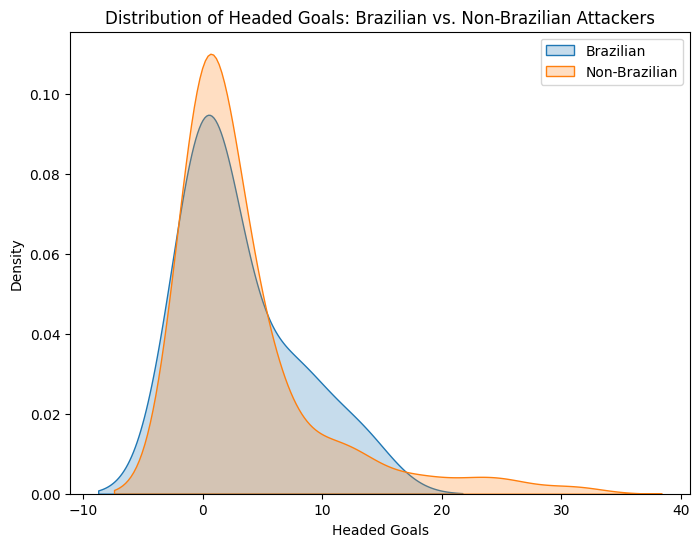

In [32]:
# Marking each player as Brazilian or not
data['Is_Brazilian'] = data['Nationality'].apply(lambda x: 'Brazilian' if x == 'Brazil' else 'Non-Brazilian')

# Filtering for attackers/forwards
attackers = data[data['Position'] == 'Forward']

plt.figure(figsize=(8, 6))
sns.kdeplot(attackers[attackers['Is_Brazilian'] == 'Brazilian']['Headed goals'], label='Brazilian', shade=True)
sns.kdeplot(attackers[attackers['Is_Brazilian'] == 'Non-Brazilian']['Headed goals'], label='Non-Brazilian', shade=True)
plt.title('Distribution of Headed Goals: Brazilian vs. Non-Brazilian Attackers')
plt.xlabel('Headed Goals')
plt.ylabel('Density')
plt.legend()
plt.show()

## 6. References <a class="anchor" id="6"></a>

1. [The Premier League](https://en.wikipedia.org/wiki/Premier_League)
2. [The 10 most expensive goalkeepers](https://www.espn.com/soccer/soccer-transfers/story/3135816/the-10-most-expensive-goalkeepers-kepa-alisson-becker-courtois-ederson)
3. [10 most expensive defenders of all time](https://www.kickoff.com/news/articles/world-news/categories/news/english-premier-league/the-10-most-expensive-defenders-of-all-time/681803?gallery=681803&gallery-page=11#ig)
4. https://plotly.com/

<div>    
<img src="https://www.collinsdictionary.com/images/full/goldengoal_110918564.jpg" width="250"/>   
</div>


###  <span align="center" style= 'background:skyblue'> Thank you very much for reading this notebook! </span>

  

<a href="#top">Back to top</a>